# Diabetes Indicators Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://final-project.super.site/)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story Behind The Data
Diabetes is one of the most prevalent chronic diseases in the US, impacting millions of Americans each year and exerting a significant financial burden on the economy. 
Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. 
After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. 
This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. 
Diabetes is generally characterised by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [64]:
# Let's load and see some values
demographic_df = pd.read_csv("demographic_data.csv")
enriched_df = pd.read_csv("enriched_data.csv")
health_measures_df = pd.read_csv("health_measures.csv")
id_label_df = pd.read_csv("id_label.csv")

In [65]:
# Merging the datasets on uniqueID
df = pd.merge(demographic_df, enriched_df, on='uniqueID')
df = pd.merge(df, health_measures_df, on='uniqueID')
df = pd.merge(df, id_label_df, on='uniqueID')

In [66]:
# Making sure it worked
df.head()

,uniqueID,Sex,Age,Education,Income,PhysHlth,Smoker,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Diabetes_binary
0,0,0,9,4,3,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,1,0,7,6,1,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,2,0,9,4,8,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,3,0,11,3,6,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,4,0,11,5,4,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


In [9]:
df.shape

(253680, 23)

In [10]:
df.tail()

,uniqueID,Sex,Age,Education,Income,PhysHlth,Smoker,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Diabetes_binary
253675,253675,1,5,6,7,5,0,0,45,0,3,1,1,1,0,1,0,1,0,0,0,1,0.0
253676,253676,0,11,2,4,0,0,0,18,1,4,1,1,1,0,0,0,0,0,0,0,1,1.0
253677,253677,0,2,5,2,0,0,0,28,0,1,0,0,1,0,0,0,1,1,0,0,1,0.0
253678,253678,1,7,5,1,0,0,0,23,0,3,1,0,1,0,1,0,1,0,0,0,1,0.0
253679,253679,0,9,6,2,0,0,1,25,0,2,1,1,1,0,0,0,1,1,0,0,1,1.0


In [11]:
df.columns

Index(['uniqueID', 'Sex', 'Age', 'Education', 'Income', 'PhysHlth', 'Smoker',
       'HeartDiseaseorAttack', 'BMI', 'DiffWalk', 'GenHlth', 'HighBP',
       'HighChol', 'CholCheck', 'MentHlth', 'Veggies', 'Stroke', 'Fruits',
       'PhysActivity', 'HvyAlcoholConsump', 'NoDocbcCost', 'AnyHealthcare',
       'Diabetes_binary'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   uniqueID              253680 non-null  int64  
 1   Sex                   253680 non-null  int64  
 2   Age                   253680 non-null  int64  
 3   Education             253680 non-null  int64  
 4   Income                253680 non-null  int64  
 5   PhysHlth              253680 non-null  int64  
 6   Smoker                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   BMI                   253680 non-null  int64  
 9   DiffWalk              253680 non-null  int64  
 10  GenHlth               253680 non-null  int64  
 11  HighBP                253680 non-null  int64  
 12  HighChol              253680 non-null  int64  
 13  CholCheck             253680 non-null  int64  
 14  MentHlth              253680 non-null  int64  
 15  

In [13]:
df.isna().sum()

uniqueID                0
Sex                     0
Age                     0
Education               0
Income                  0
PhysHlth                0
Smoker                  0
HeartDiseaseorAttack    0
BMI                     0
DiffWalk                0
GenHlth                 0
HighBP                  0
HighChol                0
CholCheck               0
MentHlth                0
Veggies                 0
Stroke                  0
Fruits                  0
PhysActivity            0
HvyAlcoholConsump       0
NoDocbcCost             0
AnyHealthcare           0
Diabetes_binary         0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
for i in df.columns:
    print(f'{i} contains {df[i].nunique()} unique values')

uniqueID contains 253680 unique values
Sex contains 2 unique values
Age contains 13 unique values
Education contains 6 unique values
Income contains 8 unique values
PhysHlth contains 31 unique values
Smoker contains 2 unique values
HeartDiseaseorAttack contains 2 unique values
BMI contains 84 unique values
DiffWalk contains 2 unique values
GenHlth contains 5 unique values
HighBP contains 2 unique values
HighChol contains 2 unique values
CholCheck contains 2 unique values
MentHlth contains 31 unique values
Veggies contains 2 unique values
Stroke contains 2 unique values
Fruits contains 2 unique values
PhysActivity contains 2 unique values
HvyAlcoholConsump contains 2 unique values
NoDocbcCost contains 2 unique values
AnyHealthcare contains 2 unique values
Diabetes_binary contains 2 unique values


In [16]:
df.describe()

,uniqueID,Sex,Age,Education,Income,PhysHlth,Smoker,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.440342,8.032119,5.050434,6.053875,4.242081,0.443169,0.094186,28.382364,0.168224,2.511392,0.429001,0.424121,0.962670,3.184772,0.811420,0.040571,0.634256,0.756544,0.056197,0.084177,0.951053,0.139333
std,73231.252481,0.496429,3.054220,0.985774,2.071148,8.717951,0.496761,0.292087,6.608694,0.374066,1.068477,0.494934,0.494210,0.189571,7.412847,0.391175,0.197294,0.481639,0.429169,0.230302,0.277654,0.215759,0.346294
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63419.750000,0.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,126839.500000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000,27.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,190259.250000,1.000000,10.000000,6.000000,8.000000,3.000000,1.000000,0.000000,31.000000,0.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,253679.000000,1.000000,13.000000,6.000000,8.000000,30.000000,1.000000,1.000000,98.000000,1.000000,5.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

Issues found:
- The uniqueID column is no longer necessary
- all the headers should be lowercase
- gender is currently 0 and 1 values, which makes it harder than necessary to understand
- health dict is not intuitive with higher scores meaning lower ratings. Change for clarity
- some columns have multiple values for the same thing

In [67]:
# Creating a copy before cleaning
clean_df = df.copy()

In [68]:
# Making sure it worked
clean_df.head()

,uniqueID,Sex,Age,Education,Income,PhysHlth,Smoker,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Diabetes_binary
0,0,0,9,4,3,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,1,0,7,6,1,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,2,0,9,4,8,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,3,0,11,3,6,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,4,0,11,5,4,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


In [69]:
# Dropping UniqueID column
clean_df = clean_df.drop('uniqueID', axis=1)

In [74]:
# all the headers should be lowercase
clean_df.columns = [x.lower() for x in clean_df.columns]

In [77]:
# gender is currently 0 and 1 values, which makes it harder than necessary to understand

gender_values = {0:"female",
                1:"male"}
clean_df = clean_df.replace({"sex" : gender_values})

In [71]:
# health dict is not intuitive with higher scores meaning lower ratings. Change for clarity
health_values = {1 : "excellent",
                 2 : "very good",
                 3 : "good",
                 4 : "fair",
                 5 : "poor"}

clean_df = clean_df.replace({"genhlth" : health_values})

In [78]:
# some columns have multiple values for the same thing

#Income has multiple choices that mean the same thing and the column is difficult to decipher as is. Let's change that. 
income_values = {1 : "<15k",
                2 : "<15k",
                3 : "15k to <25k",
                4 : "15k to <25k",
                5 : "25k to <35k",
                6 : "35k to <50k",
                7 : ">=50k",
                8 : ">=50k",
                9 : "Unkown"}
clean_df = clean_df.replace({"income" : income_values})

In [79]:
clean_df['income'].value_counts()

>=50k          133604
35k to <50k     36470
15k to <25k     36129
25k to <35k     25883
<15k            21594
Name: income, dtype: int64

In [80]:
education_values = {1 : "Didn’t graduate high school",
                    2 : "Didn’t graduate high school",
                    3 : "Didn’t graduate high school",
                    4 : "graduated high school",
                    5 : "attended college or technical school",
                    6 : "graduated college or technical school",
                    9 : "unknown"}
clean_df = clean_df.replace({"education" : education_values})

In [81]:
clean_df['education'].value_counts()

graduated college or technical school    107325
attended college or technical school      69910
graduated high school                     62750
Didn’t graduate high school               13695
Name: education, dtype: int64

In [82]:
age_values = {1 : "18 <= AGE <= 24",
              2 : "25 <= AGE <= 29",
              3 : "30 <= AGE <= 34",
              4 : "35 <= AGE <= 39",
              5 : "40 <= AGE <= 44",
              6 : "45 <= AGE <= 49",
              7 : "50 <= AGE <= 54",
              8 : "55 <= AGE <= 59",
              9 : "60 <= AGE <= 64",
              10 : "65 <= AGE <= 69",
              11 : "70 <= AGE <= 74",
              12 : "75 <= AGE <= 79",
              13 : "80 <= AGE <= 99",
              14 : "unknown"}
clean_df = clean_df.replace({"age" : age_values})

In [83]:
clean_df['age'].value_counts()

60 <= AGE <= 64    33244
65 <= AGE <= 69    32194
55 <= AGE <= 59    30832
50 <= AGE <= 54    26314
70 <= AGE <= 74    23533
45 <= AGE <= 49    19819
80 <= AGE <= 99    17363
40 <= AGE <= 44    16157
75 <= AGE <= 79    15980
35 <= AGE <= 39    13823
30 <= AGE <= 34    11123
25 <= AGE <= 29     7598
18 <= AGE <= 24     5700
Name: age, dtype: int64

In [84]:
# Making sure it worked

clean_df.head()

,sex,age,education,income,physhlth,smoker,heartdiseaseorattack,bmi,diffwalk,genhlth,highbp,highchol,cholcheck,menthlth,veggies,stroke,fruits,physactivity,hvyalcoholconsump,nodocbccost,anyhealthcare,diabetes_binary
0,female,60 <= AGE <= 64,graduated high school,15k to <25k,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,female,50 <= AGE <= 54,graduated college or technical school,<15k,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,female,60 <= AGE <= 64,graduated high school,>=50k,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,female,70 <= AGE <= 74,Didn’t graduate high school,35k to <50k,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,female,70 <= AGE <= 74,attended college or technical school,15k to <25k,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


In [85]:
# Excellent! Let's save this so we don't have to run the cleaning again

#clean_df.to_csv(r'C:\Users\Liberty\Desktop\Master School\Capstone Project 2\diabetes_indicators_clean.csv', index=False, header=True)
clean_df.to_csv("diabetes_indicators_clean.csv", index=False, header=True)

In [2]:
df=pd.read_csv("diabetes_indicators_clean.csv")

In [3]:
df.head()

,sex,age,education,income,physhlth,smoker,heartdiseaseorattack,bmi,diffwalk,genhlth,highbp,highchol,cholcheck,menthlth,veggies,stroke,fruits,physactivity,hvyalcoholconsump,nodocbccost,anyhealthcare,diabetes_binary
0,female,60 <= AGE <= 64,graduated high school,15k to <25k,15,1,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0.0
1,female,50 <= AGE <= 54,graduated college or technical school,<15k,0,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0.0
2,female,60 <= AGE <= 64,graduated high school,>=50k,30,0,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0.0
3,female,70 <= AGE <= 74,Didn’t graduate high school,35k to <50k,0,0,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0.0
4,female,70 <= AGE <= 74,attended college or technical school,15k to <25k,0,0,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0.0


### Outliers Detection

> Since the majority of the values are yes/no and the one's that aren't are identifiers we wouldn't want to remove, there is no need to detect outliers.

## Exploratory Data Analysis

In [88]:
df.describe()

,physhlth,smoker,heartdiseaseorattack,bmi,diffwalk,genhlth,highbp,highchol,cholcheck,menthlth,veggies,stroke,fruits,physactivity,hvyalcoholconsump,nodocbccost,anyhealthcare,diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,4.242081,0.443169,0.094186,28.382364,0.168224,2.511392,0.429001,0.424121,0.962670,3.184772,0.811420,0.040571,0.634256,0.756544,0.056197,0.084177,0.951053,0.139333
std,8.717951,0.496761,0.292087,6.608694,0.374066,1.068477,0.494934,0.494210,0.189571,7.412847,0.391175,0.197294,0.481639,0.429169,0.230302,0.277654,0.215759,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,0.000000,31.000000,0.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,30.000000,1.000000,1.000000,98.000000,1.000000,5.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.columns

Index(['sex', 'age', 'education', 'income', 'physhlth', 'smoker',
       'heartdiseaseorattack', 'bmi', 'diffwalk', 'genhlth', 'highbp',
       'highchol', 'cholcheck', 'menthlth', 'veggies', 'stroke', 'fruits',
       'physactivity', 'hvyalcoholconsump', 'nodocbccost', 'anyhealthcare',
       'diabetes_binary'],
      dtype='object')

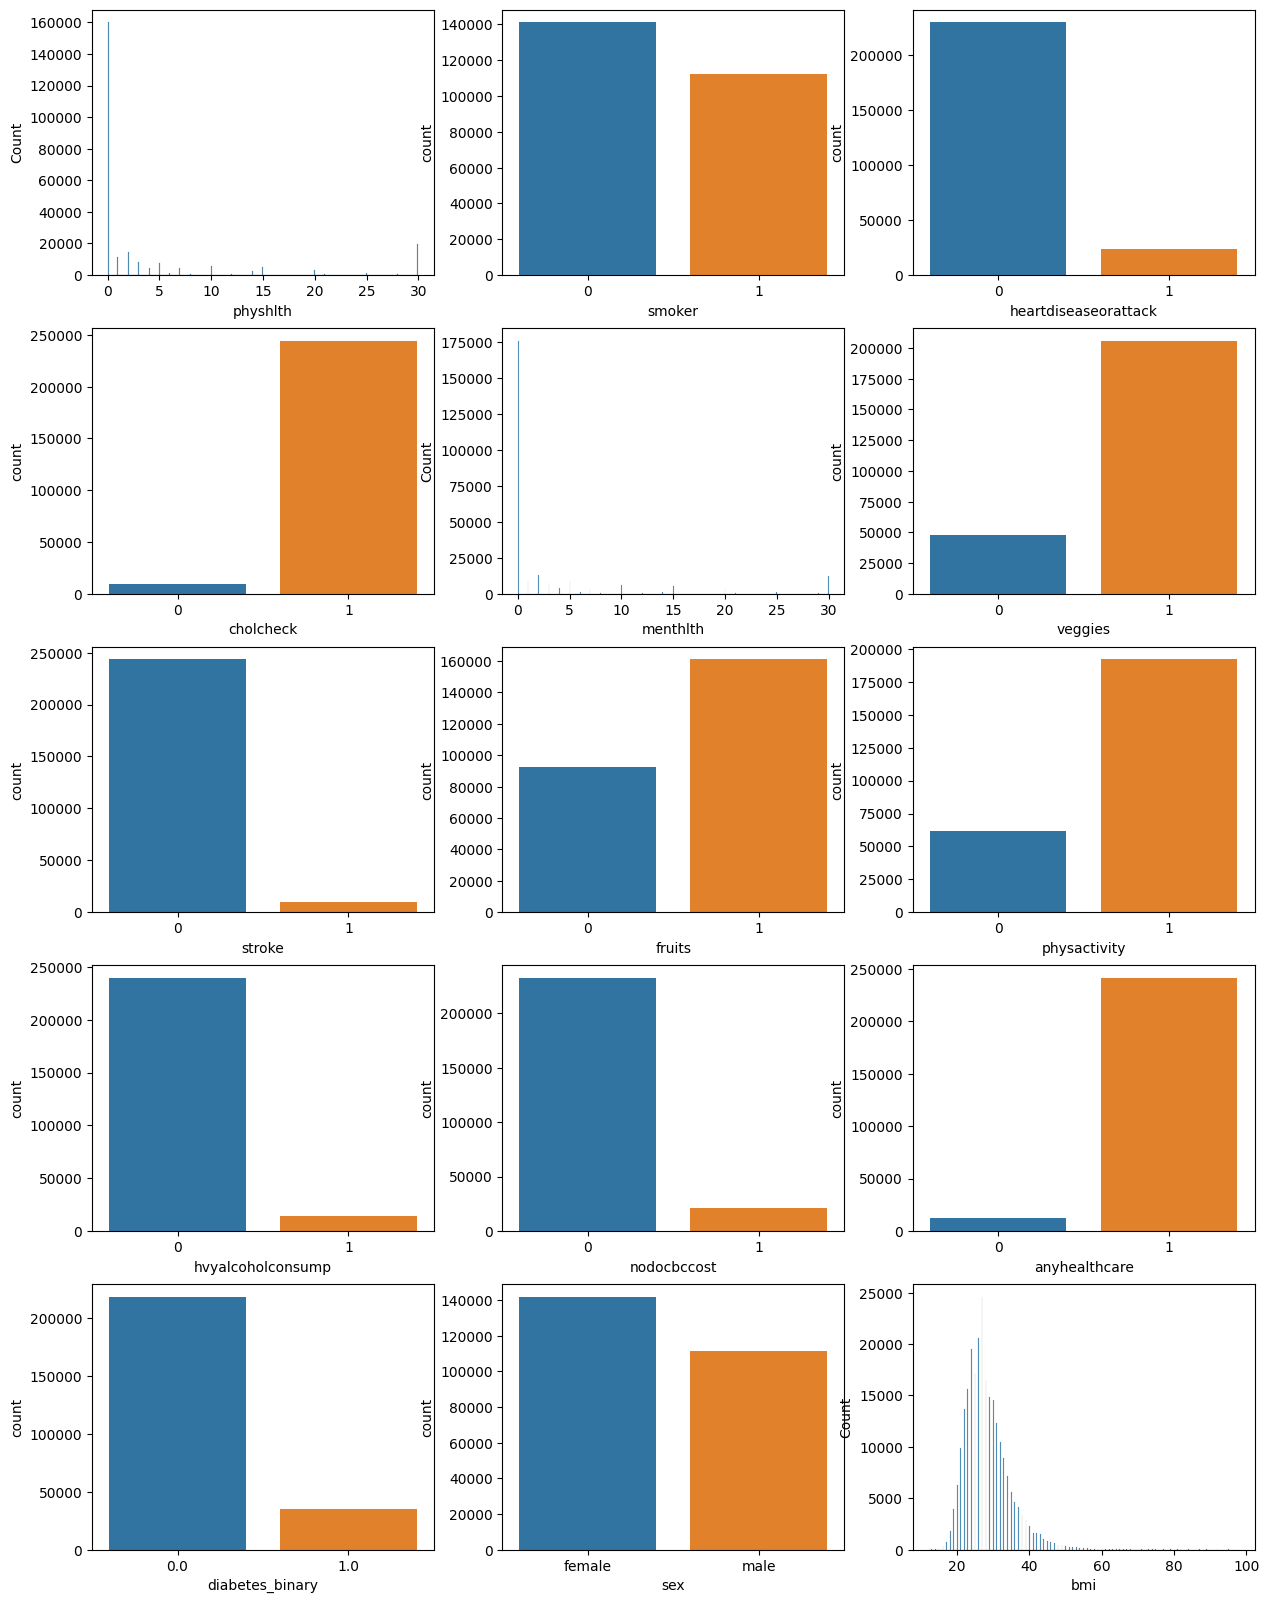

In [99]:
fig, axes = plt.subplots(5, 3, figsize=(15,20))

ax4 = sns.histplot(x="physhlth", data=df, ax=axes[0,0])
ax5 = sns.countplot(x="smoker", data=df, ax=axes[0,1])
ax6 = sns.countplot(x="heartdiseaseorattack", data=df, ax=axes[0,2])
ax7 = sns.countplot(x="cholcheck", data=df, ax=axes[1,0])
ax8 = sns.histplot(x="menthlth", data=df, ax=axes[1,1])
ax9 = sns.countplot(x="veggies", data=df, ax=axes[1,2])
ax10 = sns.countplot(x="stroke", data=df, ax=axes[2,0])
ax11 = sns.countplot(x="fruits", data=df, ax=axes[2,1])
ax12 = sns.countplot(x="physactivity", data=df, ax=axes[2,2])
ax13 = sns.countplot(x="hvyalcoholconsump", data=df, ax=axes[3,0])
ax14 = sns.countplot(x="nodocbccost", data=df, ax=axes[3,1])
ax15 = sns.countplot(x="anyhealthcare", data=df, ax=axes[3,2])
ax16 = sns.countplot(x="diabetes_binary", data=df, ax=axes[4,0])
ax17 = sns.countplot(x="sex", data=df, ax=axes[4,1])
ax18 = sns.histplot(x="bmi", data=df, ax=axes[4,2])

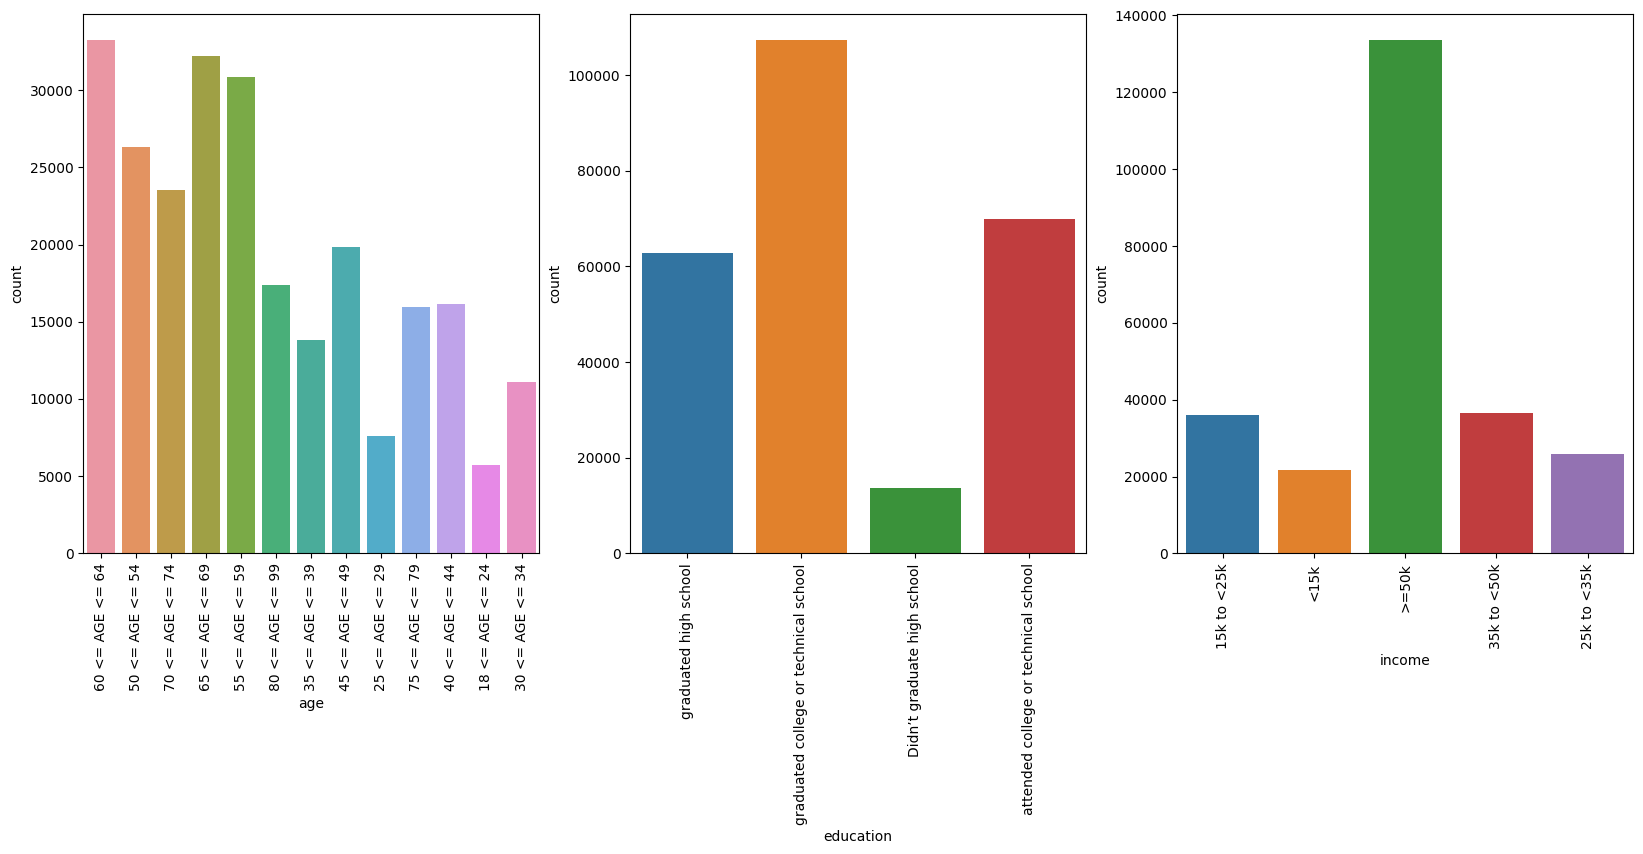

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

ax1 = sns.countplot(x="age", data=df, ax=axes[0])
ax2 = sns.countplot(x="education", data=df, ax=axes[1])
ax3 = sns.countplot(x="income", data=df, ax=axes[2])

for i in axes:
    i.set_xticklabels(i.get_xticklabels(), rotation=90, fontsize=10)

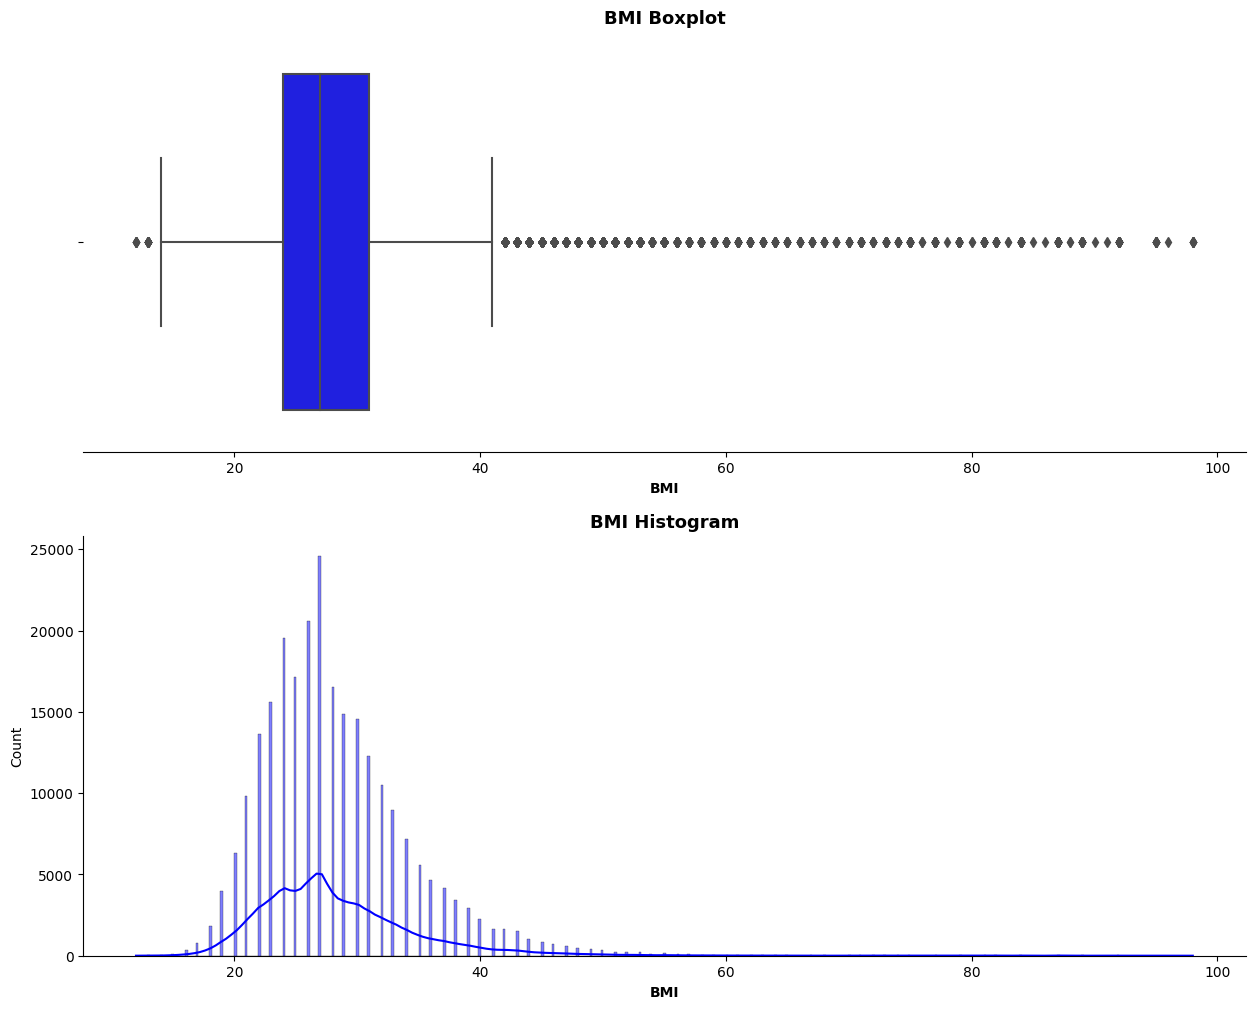

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="bmi",
            data=df, 
            color="blue",
            ax=ax[0])

ax.set_title('BMI Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('BMI', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "bmi",
                  data=df,
                  kde=True,
                  color="blue")
ax1.set_title('BMI Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('BMI', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [4]:
diabetic_df = df[df.diabetes_binary == 1]
nondiabetic_df = df[df.diabetes_binary == 0]

Text(0.5, 1.0, 'BMI of Non-Diabetics')

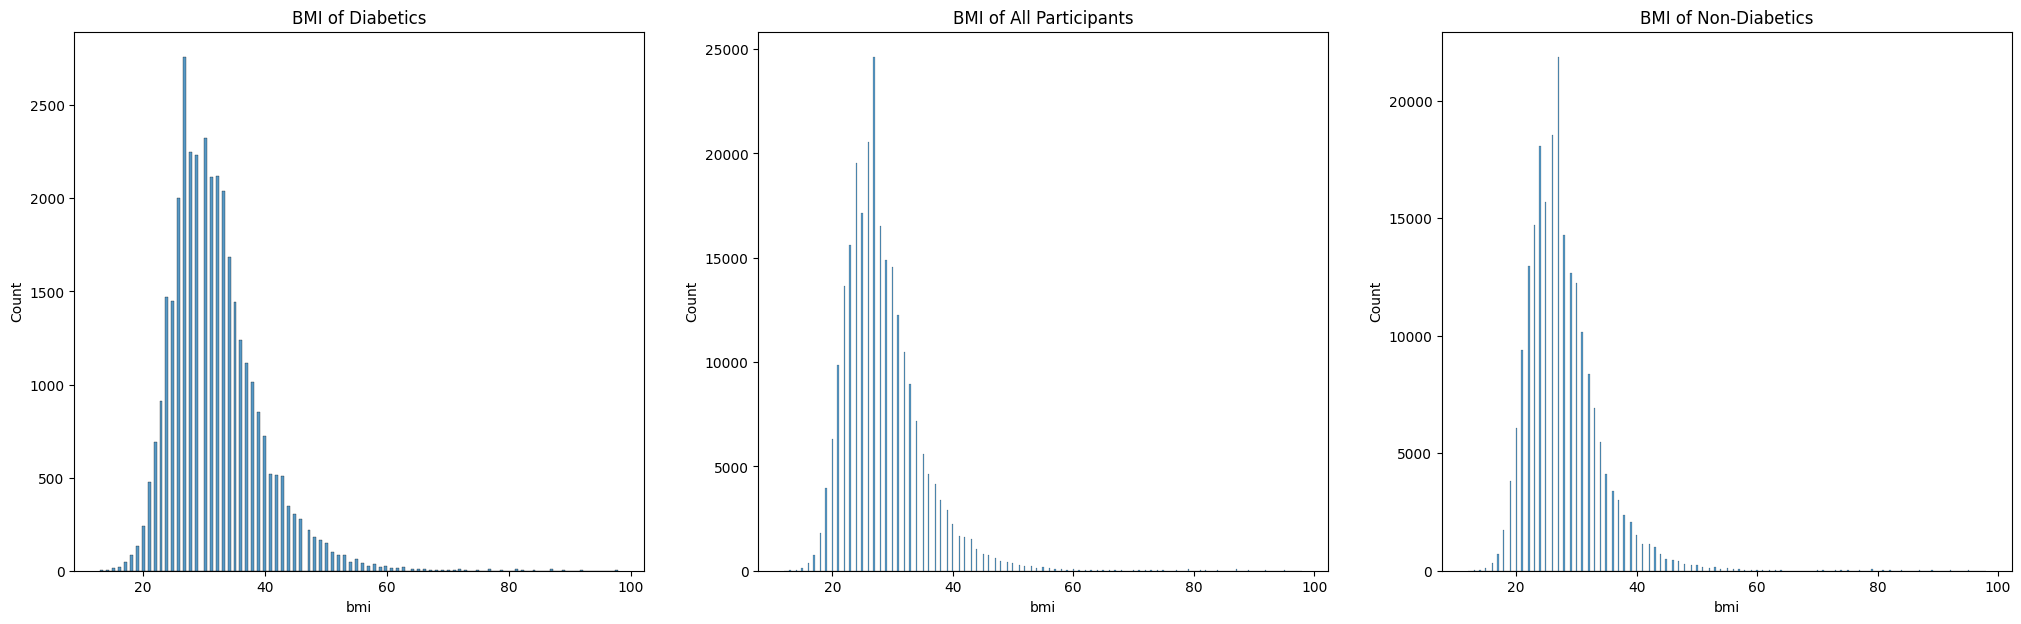

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.histplot(x="bmi", data=diabetic_df, ax=axes[0])
ax1 = sns.histplot(x="bmi", data=df, ax=axes[1])
ax2 = sns.histplot(x="bmi", data=nondiabetic_df, ax=axes[2])             
axes[0].set_title('BMI of Diabetics')
axes[1].set_title('BMI of All Participants')
axes[2].set_title('BMI of Non-Diabetics')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'physhlth'),
  Text(1.5, 0, 'smoker'),
  Text(2.5, 0, 'heartdiseaseorattack'),
  Text(3.5, 0, 'bmi'),
  Text(4.5, 0, 'diffwalk'),
  Text(5.5, 0, 'genhlth'),
  Text(6.5, 0, 'highbp'),
  Text(7.5, 0, 'highchol'),
  Text(8.5, 0, 'cholcheck'),
  Text(9.5, 0, 'menthlth'),
  Text(10.5, 0, 'veggies'),
  Text(11.5, 0, 'stroke'),
  Text(12.5, 0, 'fruits'),
  Text(13.5, 0, 'physactivity'),
  Text(14.5, 0, 'hvyalcoholconsump'),
  Text(15.5, 0, 'nodocbccost'),
  Text(16.5, 0, 'anyhealthcare'),
  Text(17.5, 0, 'diabetes_binary')])

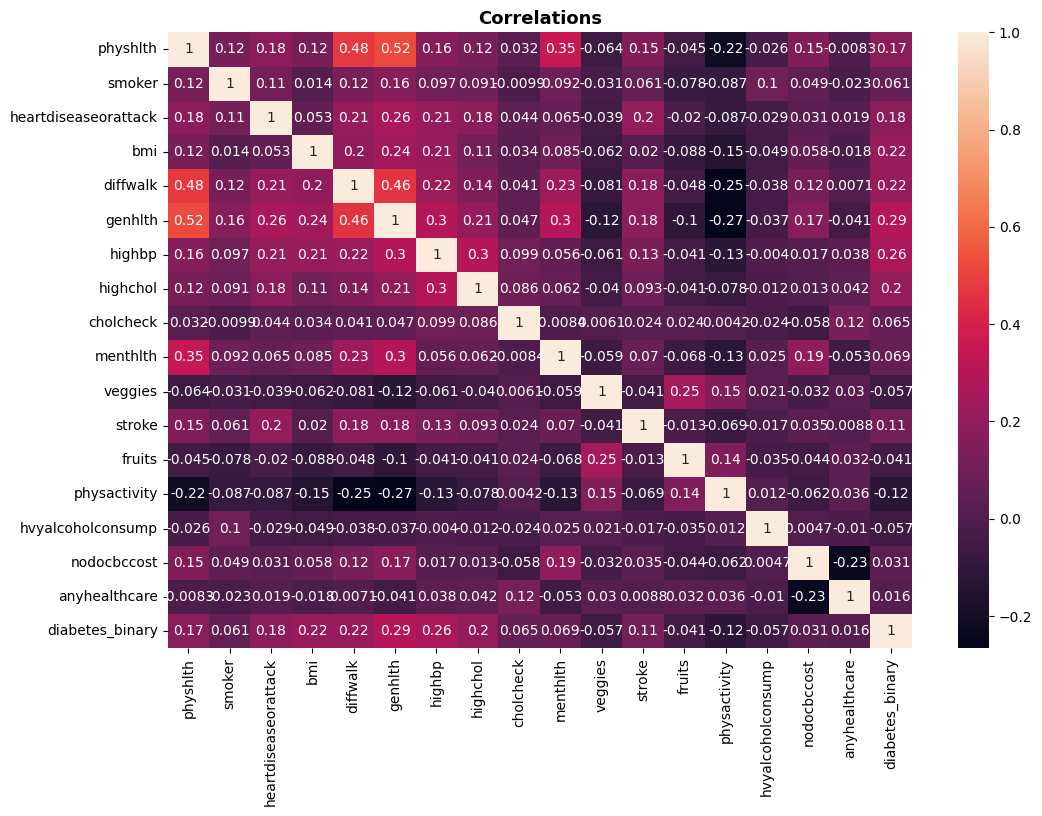

In [100]:
number_columns = df.select_dtypes(include=[int,float]).columns.tolist()
plt.figure(figsize = [12, 8])
ax = sns.heatmap(df[number_columns].corr(), 
           annot = True)
ax.set_title('Correlations', fontdict={'size': 13, 'weight': 'semibold'})
plt.xticks(rotation = 90)

# Jack suggests playing with this code to make it prettier: 
# top_mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
# heatmap = sns.heatmap(data.corr(),vmin=-.5, vmax=.5, annot=True, mask=top_mask, cmap='coolwarm', fmt='.2f', square=True)

Found the following positive correlations: 
- difficulty walking/climbing stairs with physical injury in the last 30 days
- general health with physical injury in the last 30 days
- general health with difficulty walking/climbing stairs

Found the following negative correlations: 
- difficulty walking/climbing stairs with physical activity in the last 30 days
- general health with physical activity in the last 30 days
- physical injury in the last 30 days with physical activity in the last 30 days
- lack of healthcare with the need to see a doctor but being unable to due to cost in the last year

### When it comes specifically to whether or not a particpant is diabetic the following observations can be seen: 

Positive (medium):
- High blood pressure
- General Health

Positive (weak):
- BMI
- Difficulty walking/climbing stairs
- High Cholesterol

Negative (strong):
- Physical activity in the past 30 days (not including work)

Negative (medium):
- Eating fruits at least once per day
- Eating vegetables at least once per day
- Lack of heavy alcohol cunsumption (defined as 7 drinks/week for women & 14 drinks/week for men)

# Conclusions

- General health and high blood pressure are correlated with a higher likelihood of diabetes and it would stand to reason that taking care of one's health is important overall. 

# Recommendations

- For people interested in decreasing their risk of diabetes I would suggest that they eat fruits and vegetables at least once per day, limit their alcohol cunsumption, and exercise regularly. 

# Enriching The Data

- I would like to be able to better predict diabetes. This could be done by providing us an understanding of whether participants have type 1 or type 2 diabetes. 
- Location information would allow me to further understand whether people in certain areas are more likely to be diabetic and the reasons why. 
- Behaviors that might be more/less indicative of diabetes such as dietary preferences and amount/frequency of exercise.
- Living situation such as whether the participant lives alone and cooks their own meals or lives with family.

**~*~*~*~*~**